# Supplemental Data Cleaning

In [1]:
""" Notebook Setup/Imports
"""

# Project path setup
from pathlib import Path
project_dir = Path(__name__).resolve().parents[1]

# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Print strings as markdown
from IPython.display import Markdown

# Data variables from previous notebook
dataset = pd.read_pickle(Path.joinpath(project_dir, "data/production/data.pickle"))
data_dictionary = pd.read_pickle(Path.joinpath(project_dir, "data/production/data_dictionary.pickle"))

## Missing Data

### Puerto Rico
The only data we have for PR is unemployment. We'll have to drop those records (state fips 72xxx)

In [2]:
dataset = dataset.loc[:72000]

In [3]:
dataset.drop(["POV04_2017", "CI90LB04_2017", "CI90UB04_2017"], axis="columns", inplace=True)

In [4]:
des = dataset.describe().transpose()
missing = des[des['count'] < 3100].sort_values('count',ascending=True)
missing.head(10)

,count,mean,std,min,25%,50%,75%,max
CI90UB04P_2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PCTPOV04_2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"School Breakfast Program participants, FY 2012",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
School Breakfast Program participants FY 2011,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CI90LB04P_2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PCH_GHVEG_SQFT_07_12,340.0,293.407765,1552.882709,-100.0,5.136883,91.526644,247.162519,27641.176471
PCH_FRESHVEG_ACRES_07_12,1050.0,18.500991,137.106529,-100.0,-43.138924,-6.832298,38.374335,1933.333333
PCH_GHVEG_FARMS_07_12,1198.0,93.698960,201.700770,-100.0,-25.000000,50.000000,166.666667,1900.000000
PCH_AGRITRSM_RCT_07_12,1265.0,232.446302,1026.854679,-100.0,-40.782828,22.767857,146.756757,20557.142857
PCH_BERRY_ACRES_07_12,1271.0,55.640862,222.514271,-100.0,-30.602007,4.317959,66.666667,4400.000000


In [5]:
# drop <500
cols_to_drop = missing[missing['count']<500].index.values.tolist()
dataset.drop(cols_to_drop, axis='columns', inplace=True)

In [6]:
des = dataset.describe().transpose()
missing = des[des['count'] < 3100].sort_values('count',ascending=True)
missing.head()

,count,mean,std,min,25%,50%,75%,max
PCH_FRESHVEG_ACRES_07_12,1050.0,18.500991,137.106529,-100.0,-43.138924,-6.832298,38.374335,1933.333333
PCH_GHVEG_FARMS_07_12,1198.0,93.698960,201.700770,-100.0,-25.000000,50.000000,166.666667,1900.000000
PCH_AGRITRSM_RCT_07_12,1265.0,232.446302,1026.854679,-100.0,-40.782828,22.767857,146.756757,20557.142857
PCH_BERRY_ACRES_07_12,1271.0,55.640862,222.514271,-100.0,-30.602007,4.317959,66.666667,4400.000000
FRESHVEG_ACRESPTH07,1840.0,19.919106,102.498308,0.0,0.315125,1.440052,4.833024,1831.927101


In [7]:
missing_ratios = 1- (missing['count'] / len(dataset))
missing["missing_ratio"] = missing_ratios
missing = missing[["count","missing_ratio"]]

In [8]:
# Columns missing more than 1/3 of the data
len(missing[missing['missing_ratio'] > .33])

17

In [9]:
# drop <2/3
cols_to_drop = missing[missing['missing_ratio'] > .33].index.values.tolist()
dataset.drop(cols_to_drop, axis='columns', inplace=True)

## Meta or Unneeded Variables

In [10]:
if 'index' in dataset.columns.values.tolist():
    dataset.set_index("index", inplace=True)

### Clean up Data Dictionary Orphans

In [11]:
remaining_columns = dataset.columns.values.tolist()
dd_columns = data_dictionary['Variable Code'].values.tolist()

In [12]:
orphans = [] # columns in dataset not in the data dictionary
for col in remaining_columns:
    if col not in dd_columns:
        print(col)
        orphans.append(col)

2010 Census Population
LACCESS_CHILD_10_15
StateFIPS 
WIC participants FY 2009
National School Lunch Program participants FY 2009
School Breakfast Program participants FY 2009
Child and Adult Care particpants FY 2009
Summer Food particpants FY 2009
State Population, 2009
USDA Model
Less than a high school diploma, 2013-17
High school diploma only, 2013-17
Some college or associate's degree, 2013-17
Bachelor's degree or higher, 2013-17
Percent of adults with less than a high school diploma, 2013-17
Percent of adults with a high school diploma only, 2013-17
Percent of adults completing some college or associate's degree, 2013-17
Percent of adults with a bachelor's degree or higher, 2013-17


In [13]:
# Drop state info from 2009
o_nine_columns = ['WIC participants FY 2009',
'National School Lunch Program participants FY 2009',
'School Breakfast Program participants FY 2009',
'Child and Adult Care particpants FY 2009',
'Summer Food particpants FY 2009',
'State Population, 2009']

dataset.drop(o_nine_columns, axis="columns", inplace=True)

In [14]:
# add self-explainitory columns to dictionary
edu_cols = ['''Less than a high school diploma, 2013-17''',
            '''High school diploma only, 2013-17''',
            '''Some college or associate's degree, 2013-17''',
            '''Bachelor's degree or higher, 2013-17''',
            '''Percent of adults with less than a high school diploma, 2013-17''',
            '''Percent of adults with a high school diploma only, 2013-17''',
            '''Percent of adults completing some college or associate's degree, 2013-17''',
            '''Percent of adults with a bachelor's degree or higher, 2013-17''',
            '''2010 Census Population''']
data_dictionary = pd.concat([data_dictionary,
                           pd.DataFrame({
                               'Variable Name': edu_cols,
                               'Variable Code': edu_cols
                           })],sort=False)

In [15]:
remaining_columns = dataset.columns.values.tolist()
dd_columns = data_dictionary['Variable Code'].values.tolist()
orphans = [] # columns in dataset not in the data dictionary
for col in remaining_columns:
    if col not in dd_columns:
        if col != "USDA Model":
            print(col)
            orphans.append(col)

LACCESS_CHILD_10_15
StateFIPS 


In [16]:
# Drop orphans
dataset.drop(orphans, axis="columns", inplace=True)

In [17]:
# Remove unneeded entries from the data_dictionary
remaining_columns = dataset.columns.values.tolist()
dd_in_dataset_mask = data_dictionary['Variable Code'].apply(lambda x: x in remaining_columns)
print("There are {} columns in the dictionary that are not in the dataset. \n\
There are {} columns in the dictionary that ARE in the dataset".format(
    sum(~dd_in_dataset_mask),sum(dd_in_dataset_mask)))
print("\nThere are {} columns in the dataset, and {} matches in the data dictionary.\n\
There should be a difference of one for the response variable".format(len(dataset.columns),sum(dd_in_dataset_mask)))

There are 125 columns in the dictionary that are not in the dataset. 
There are 251 columns in the dictionary that ARE in the dataset

There are 252 columns in the dataset, and 251 matches in the data dictionary.
There should be a difference of one for the response variable


In [18]:
data_dictionary = data_dictionary[dd_in_dataset_mask]

## Year-based data outside of the target range (2015)

In [19]:
out_of_range_cols = [
"PCH_GROC_09_14",
"GROCPTH09",
"SUPERC09",
"PCH_SUPERC_09_14",
"SUPERCPTH09",
"CONVS09",
"PCH_CONVS_09_14",
"CONVSPTH09",
"SPECS09",
"PCH_SPECS_09_14",
"SPECSPTH09",
"SNAPS12",
"PCH_SNAPS_12_16",
"SNAPSPTH12",
"WICS08",
"PCH_WICS_08_12",
"WICSPTH08",
"FFR09",
"PCH_FFR_09_14",
"FFRPTH09",
"FSR09",
"PCH_FSR_09_14",
"FSRPTH09",
"PC_FFRSALES07",
"PC_FSRSALES07",
"REDEMP_SNAPS12",
"PCH_REDEMP_SNAPS_12_16",
"PCT_SNAP12",
"PCH_SNAP_12_16",
"PC_SNAPBEN10",
"PCH_PC_SNAPBEN_10_15",
"SNAP_PART_RATE08",
"SNAP_OAPP09",
"SNAP_CAP09",
"SNAP_BBCE09",
"SNAP_REPORTSIMPLE09",
"PCT_NSLP09",
"PCH_NSLP_09_15",
"PCT_FREE_LUNCH09",
"PCT_REDUCED_LUNCH09",
"PCT_SBP09",
"PCH_SBP_09_15",
"PCT_SFSP09",
"PCH_SFSP_09_15",
"PCT_WIC09",
"PCH_WIC_09_15",
"PCT_CACFP09",
"PCH_CACFP_09_15",
"FOODINSEC_10_12",
"CH_FOODINSEC_12_15",
"VLFOODSEC_10_12",
"CH_VLFOODSEC_12_15",
"FOODINSEC_CHILD_01_07",
"FOODINSEC_CHILD_03_11",
"MILK_PRICE10",
"SODA_PRICE10",
"MILK_SODA_PRICE10",
"DIRSALES_FARMS07",
"DIRSALES_FARMS12",
"PCH_DIRSALES_FARMS_07_12",
"PCT_LOCLFARM07",
"PCT_LOCLFARM12",
"PCT_LOCLSALE07",
"PCT_LOCLSALE12",
"DIRSALES07",
"DIRSALES12",
"PCH_DIRSALES_07_12",
"PC_DIRSALES07",
"PC_DIRSALES12",
"FMRKT09",
"PCH_FMRKT_09_16",
"FMRKTPTH09",
"VEG_FARMS07",
"PCH_VEG_FARMS_07_12",
"VEG_ACRES07",
"VEG_ACRESPTH07",
"PCH_VEG_ACRESPTH_07_12",
"FRESHVEG_FARMS07",
"PCH_FRESHVEG_FARMS_07_12",
"ORCHARD_FARMS07",
"PCH_ORCHARD_FARMS_07_12",
"ORCHARD_ACRES07",
"ORCHARD_ACRESPTH07",
"BERRY_FARMS07",
"PCH_BERRY_FARMS_07_12",
"BERRY_ACRES07",
"BERRY_ACRESPTH07",
"SLHOUSE07",
"PCH_SLHOUSE_07_12",
"GHVEG_FARMS07",
"GHVEG_SQFT07",
"GHVEG_SQFTPTH07",
"CSA07",
"PCH_CSA_07_12",
"AGRITRSM_OPS07",
"PCH_AGRITRSM_OPS_07_12",
"FARM_TO_SCHOOL09",
"PCT_DIABETES_ADULTS08",
"PCT_OBESE_ADULTS08",
"RECFAC09",
"RECFACPTH09",
"PERPOV10",
"PERCHLDPOV10",
"CI90UB517P_2017",
"POPLOSS10"]

In [20]:
dataset.drop(out_of_range_cols, axis="columns", inplace=True)

## Sparse Rows

In [21]:
n_cols = len(dataset.columns.values)
nulls_ratio = dataset.isna().sum(axis=1).apply(lambda x: x/n_cols)

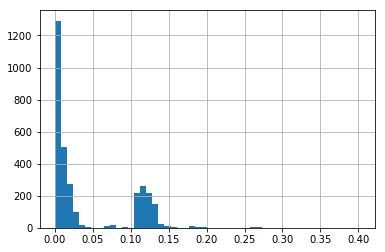

In [22]:
nulls_ratio.hist(bins=50);

In [23]:
get_proportion_nulls = lambda x: sum(nulls_ratio > x) / len(dataset)
missing_prop = {}
for i in range(0, 100, 2): 
    null_prop = get_proportion_nulls(i/100)
    if null_prop > 0:
        missing_prop[i/100] = null_prop

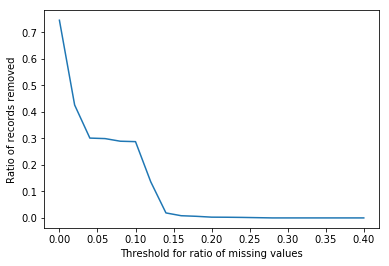

In [24]:
x = list(missing_prop.keys())
y = list(missing_prop.values())
ax = plt.plot(x,y)
plt.xlabel("Threshold for ratio of missing values")
plt.ylabel("Ratio of records removed");

In [25]:
dataset = dataset[nulls_ratio < .175]

## Fix types

In [26]:
for c in dataset.columns:
    if type(dataset[c][1001]) == str:
        dataset[c] = dataset[c].str.replace(",","")
        dataset[c] = dataset[c].astype(float)

In [27]:
dataset.get_dtype_counts()

bool         1
float64    146
dtype: int64

## Split Low Access Variables from Dataset 
These may be interesting for further modeling, but they're bound to be highly correlated with the response and other deographics.

In [28]:
access_columns = data_dictionary[data_dictionary['Category Code'] == "ACCESS"]['Variable Code']

In [29]:
access_dataset = dataset[access_columns]

In [30]:
dataset.drop(access_columns, axis="columns",inplace=True)

## Save data

In [31]:
dataset.to_csv("../data/production/clean_dataset.csv")
access_dataset.to_csv("../data/production/clean_access_dataset.csv")
data_dictionary.to_csv("../data/production/clean_data_dictionary.csv")

dataset.to_pickle("../data/production/clean_dataset.pickle")
access_dataset.to_pickle("../data/production/clean_access_dataset.pickle")
data_dictionary.to_pickle("../data/production/clean_data_dictionary.pickle")